# Data Analyst - Project Python - By Thành Trung

# 1. Introdution

Data: Bộ dữ liệu bao gồm 1000 quan sát là người vay tín dụng từ ngân hàng. Dự vào những thông tin thu thập được, mỗi quan sát đã được chia thành mức độ tín dụng tốt hay xấu dựa vào các thuộc tính liên quan.

Mục đích: Phân tích mô tả và đánh giá sự phân bổ 2 nhóm khách hàng có tín dụng tốt và xấu.

Nguồn: Kaggel

Công cụ: Jupyter Notebook

Các thuộc tính bao gồm:

    Age (numeric)    
    Sex (text: male, female)    
    Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)    
    Housing (text: own, rent, or free)    
    Saving accounts (text - little, moderate, quite rich, rich)    
    Checking account (numeric, in DM - Deutsch Mark)    
    Credit amount (numeric, in DM)    
    Duration (numeric, in month)    
    Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

# 2. Import and clearning data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar
from calendar import month_name as mn
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import plotly.graph_objs as go
import plotly.offline as py

In [3]:
df = pd.read_csv('D:\TỰ HỌC DA\Project 03.9\Credit_Risk.csv')
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Có thể thấy rằng có các giá trị không xác định trong hai cột Saving accounts và Checking account.

Có thể hiểu rằng các giá trị NaN trong cả hai cột này đều chỉ ra những người này không có tài khoản ngân hàng. Do đó, chúng ta có thể điền vào các giá trị còn thiếu này bằng 'none'.

In [4]:
#Thống kê có bao nhiêu giá trị rỗng ở cá trường

df.isna().sum()

Id                    0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [5]:
#Thay thế các giá trị rỗng bằng 'none'

df.fillna('none', inplace=True)


In [6]:
#Kiểm tra sơ bộ dữ liệu

df.head()
df.tail()
df.info()
df.describe()
print(df.nunique())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
Id                  1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        5
Checking account       4
Credit amount        921
Duration              33
Purpose             

# 3. Descriptive statistics

# a) Total Acount by Age, Job, Housing

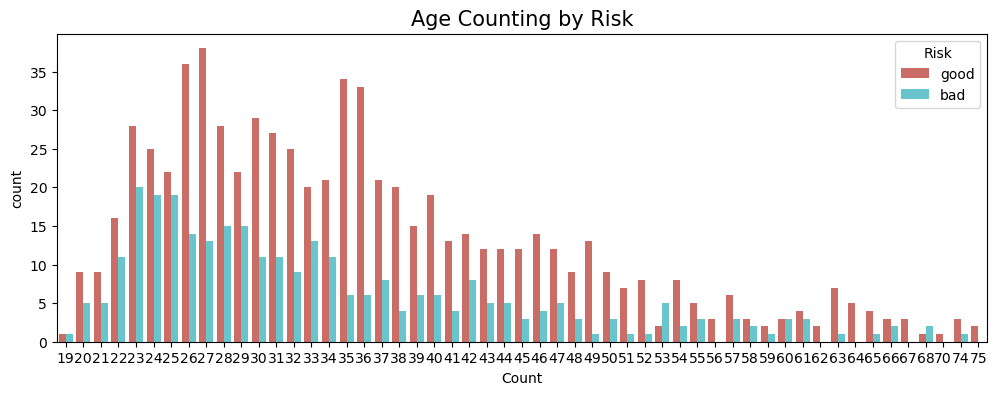

In [7]:
fig, ax = plt.subplots(figsize=(12,4))

sns.countplot(x="Age", data=df, hue = "Risk", palette="hls", ax=ax)
ax.set_title("Age Counting by Risk", fontsize=15)
ax.set_xlabel("Age")
ax.set_xlabel("Count")
plt.show()


In [8]:
#Let's look the Credit Amount column
#interval = (18, 25, 35, 60, 120)

#cats = ['Student', 'Young', 'Adult', 'Senior']
#df["Age_group"] = pd.cut(df.Age, interval, labels=cats)

#replace_dict = {0: 'unskilled_and_non-resident', 1: 'unskilled_and_resident', 2: 'skilled', 3: 'highly_skilled'}
#df['Job'] = df['Job'].replace(replace_dict)


#df_good = df[df["Risk"] == 'good']
#df_bad = df[df["Risk"] == 'bad']

In [9]:
interval = (18, 25, 35, 60, 120)
cats = ['Student', 'Young', 'Adult', 'Senior']

df["Age_group"] = pd.cut(df.Age, interval, labels=cats)

replace_dict = {0: 'unskilled_and_non-resident', 1: 'unskilled_and_resident', 2: 'skilled', 3: 'highly_skilled'}
df = df.assign(Job_group=df['Job'].replace(replace_dict))
print(df.head())

#df_good = df[df["Risk"] == 'good']
#df_bad = df[df["Risk"] == 'bad']

   Id  Age     Sex  Job Housing Saving accounts Checking account  \
0   0   67    male    2     own            none           little   
1   1   22  female    2     own          little         moderate   
2   2   49    male    1     own          little             none   
3   3   45    male    2    free          little           little   
4   4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk Age_group  \
0           1169         6             radio/TV  good    Senior   
1           5951        48             radio/TV   bad   Student   
2           2096        12            education  good     Adult   
3           7882        42  furniture/equipment  good     Adult   
4           4870        24                  car   bad     Adult   

                Job_group  
0                 skilled  
1                 skilled  
2  unskilled_and_resident  
3                 skilled  
4                 skilled  


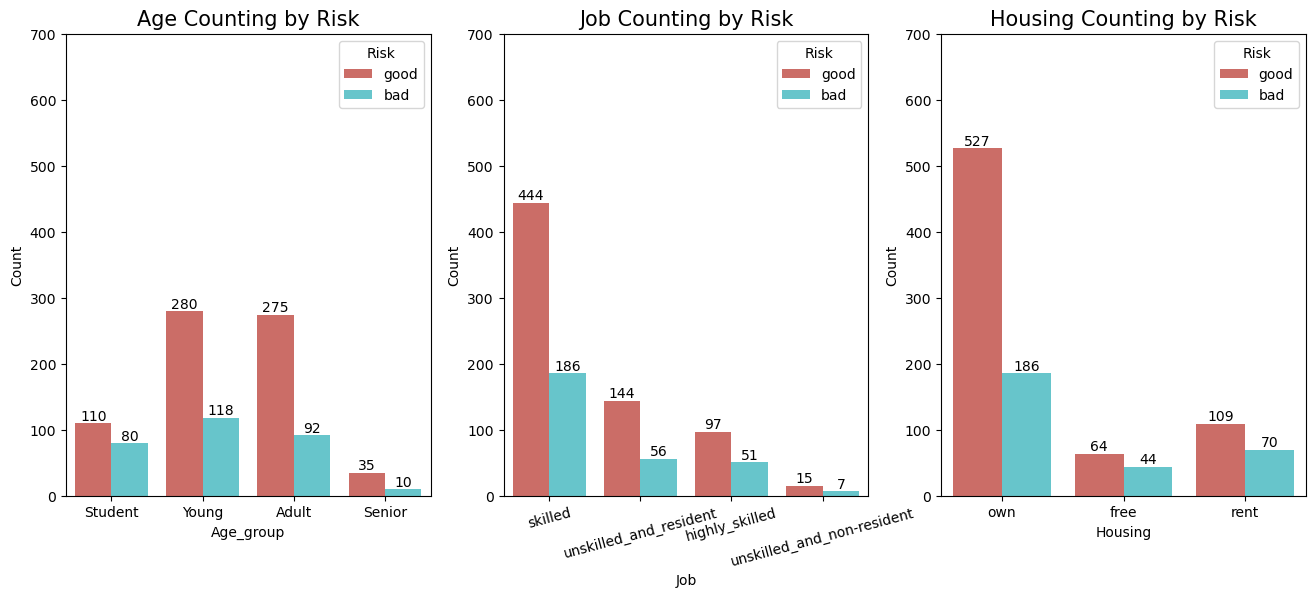

In [10]:


#fig, ax = plt.subplots(figsize=(6,4))
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))

sns.countplot(x="Age_group",data=df, hue = "Risk", palette="hls", ax=ax1)
sns.countplot(x="Job_group",data=df, hue = "Risk", palette="hls", ax=ax2)
sns.countplot(x="Housing",data=df, hue = "Risk", palette="hls", ax=ax3)



ax1.set_title("Age Counting by Risk", fontsize=15)
ax1.set_xlabel("Age_group")
ax1.set_ylabel("Count")
ax1.set_ylim([0, 700]) 

ax2.set_title("Job Counting by Risk", fontsize=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15)
ax2.set_xlabel("Job")
ax2.set_ylabel("Count")
ax2.set_ylim([0, 700]) 

ax3.set_title("Housing Counting by Risk", fontsize=15)
ax3.set_xlabel("Housing")
ax3.set_ylabel("Count")
ax3.set_ylim([0, 700]) 

for ax in [ax1, ax2, ax3]:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center',
                    va='bottom')
plt.show()

# b) Total Credit Amount by Age, Job, Housing

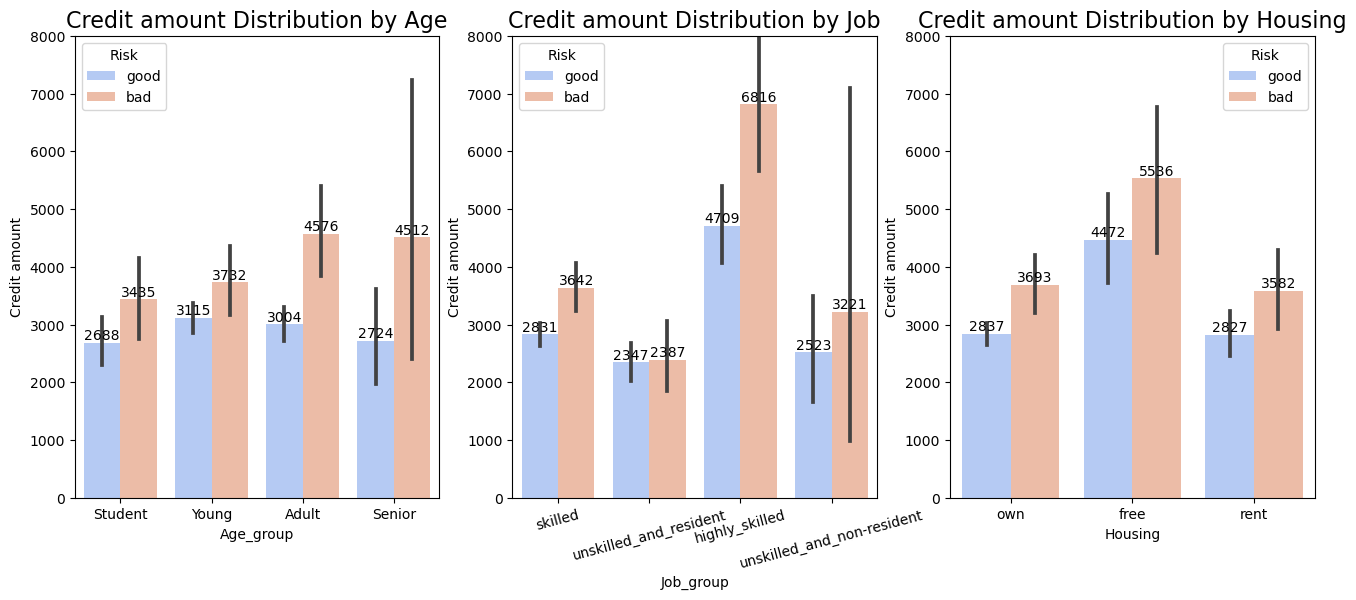

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))

sns.barplot(x="Age_group", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax1)
sns.barplot(x="Job_group", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax2)
sns.barplot(x="Housing", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax3)

ax1.set_title("Credit amount Distribution by Age", fontsize=16)
ax1.set_ylim([0, 8000]) 

ax2.set_title("Credit amount Distribution by Job", fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15)
ax2.set_ylim([0, 8000]) 

ax3.set_title("Credit amount Distribution by Housing", fontsize=16)
ax3.set_ylim([0, 8000]) 

for ax in [ax1, ax2, ax3]:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center',
                    va='bottom')
plt.show()

# c) Distribuition of Credit Amount by Age, Job, Housing

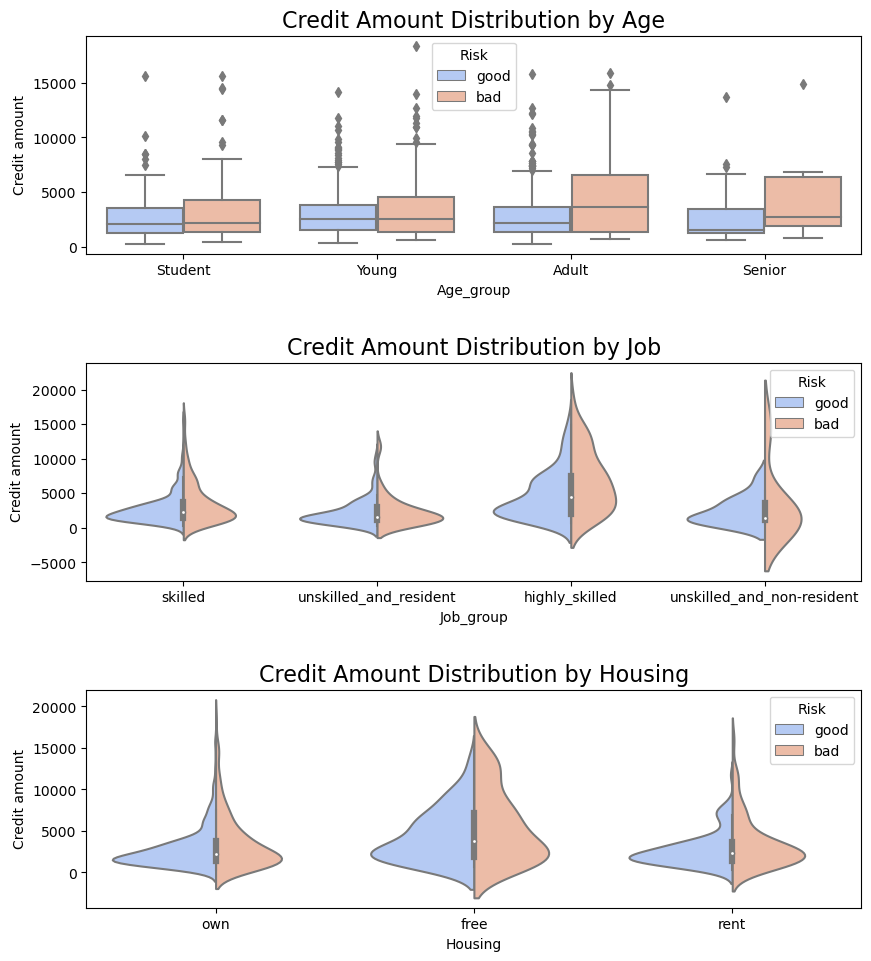

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,8))


sns.boxplot(x="Age_group", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax1)
sns.violinplot(x="Job_group", y="Credit amount", data=df, hue="Risk", palette="coolwarm", split=True, ax=ax2)
sns.violinplot(x="Housing", y="Credit amount", data=df, hue="Risk", palette="coolwarm", split=True, ax=ax3)

ax1.set_title("Credit Amount Distribution by Age", fontsize=16)
ax2.set_title("Credit Amount Distribution by Job", fontsize=16)
ax3.set_title("Credit Amount Distribution by Housing", fontsize=16)

plt.subplots_adjust(wspace = 0.7, hspace = 0.5,top = 1.2)

plt.show()

# 4. Distruibution of Saving accounts by Risk

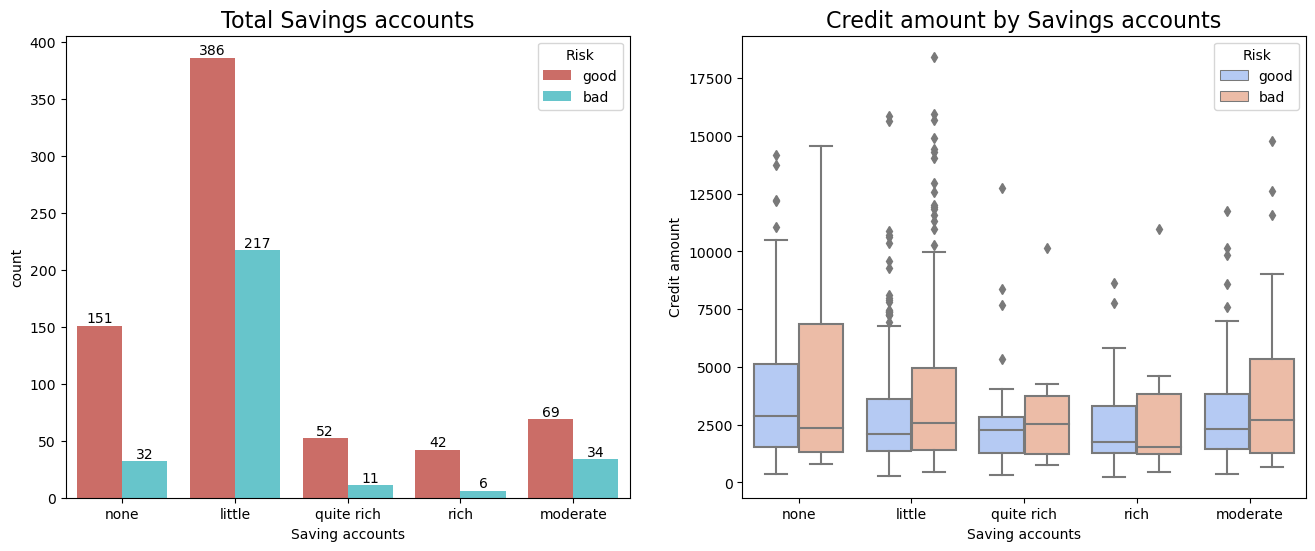

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

sns.countplot(x="Saving accounts",data=df, hue = "Risk", palette="hls", ax=ax1)
sns.boxplot(x="Saving accounts", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax2)

ax1.set_title("Total Savings accounts", fontsize=16)

ax2.set_title("Credit amount by Savings accounts", fontsize=16)

for ax in [ax1]:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center',
                    va='bottom')
plt.show()

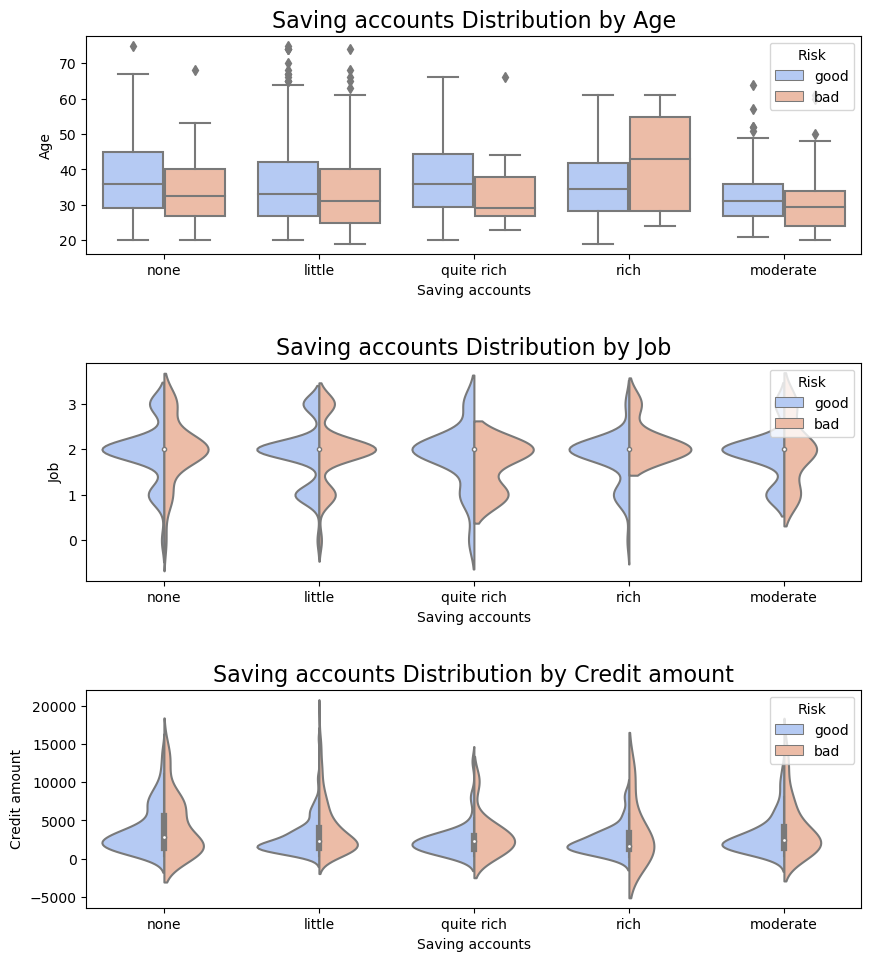

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 8))

sns.boxplot(x="Saving accounts", y="Age", data=df, hue="Risk", palette="coolwarm", ax=ax1)
sns.violinplot(x="Saving accounts", y="Job", data=df, hue="Risk", palette="coolwarm", split=True, ax=ax2)
sns.violinplot(x="Saving accounts", y="Credit amount", data=df, hue="Risk", palette="coolwarm", split=True, ax=ax3)


ax1.set_title("Saving accounts Distribution by Age", fontsize=16)
ax2.set_title("Saving accounts Distribution by Job", fontsize=16)
ax3.set_title("Saving accounts Distribution by Credit amount", fontsize=16)

plt.subplots_adjust(wspace = 0.7, hspace = 0.5,top = 1.2)

plt.show()

# 5. Distruibution of Purpose by Risk

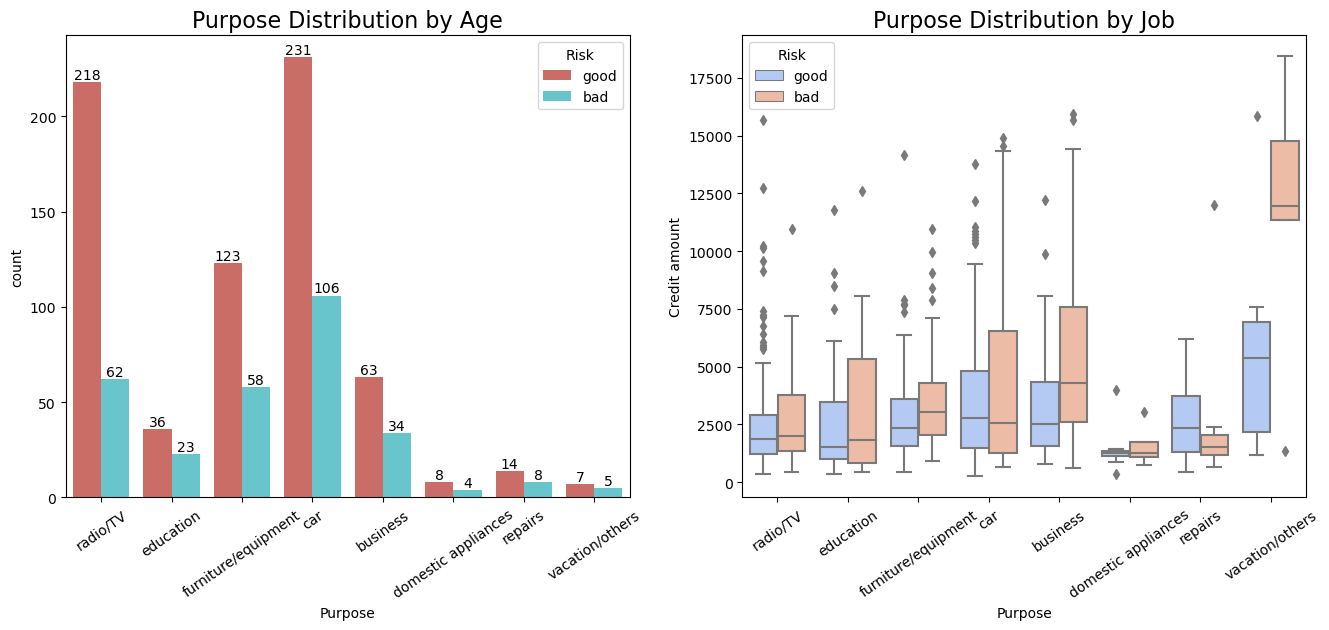

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

sns.countplot(x="Purpose",data=df, hue = "Risk", palette="hls", ax=ax1)
sns.boxplot(x="Purpose", y="Credit amount", data=df, hue="Risk", palette="coolwarm", ax=ax2)

ax1.set_title("Purpose Distribution by Age", fontsize=16)
ax1.set_xticklabels(ax2.get_xticklabels(), rotation=35)

ax2.set_title("Purpose Distribution by Job", fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=35)

for ax in [ax1]:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center',
                    va='bottom')
plt.show()

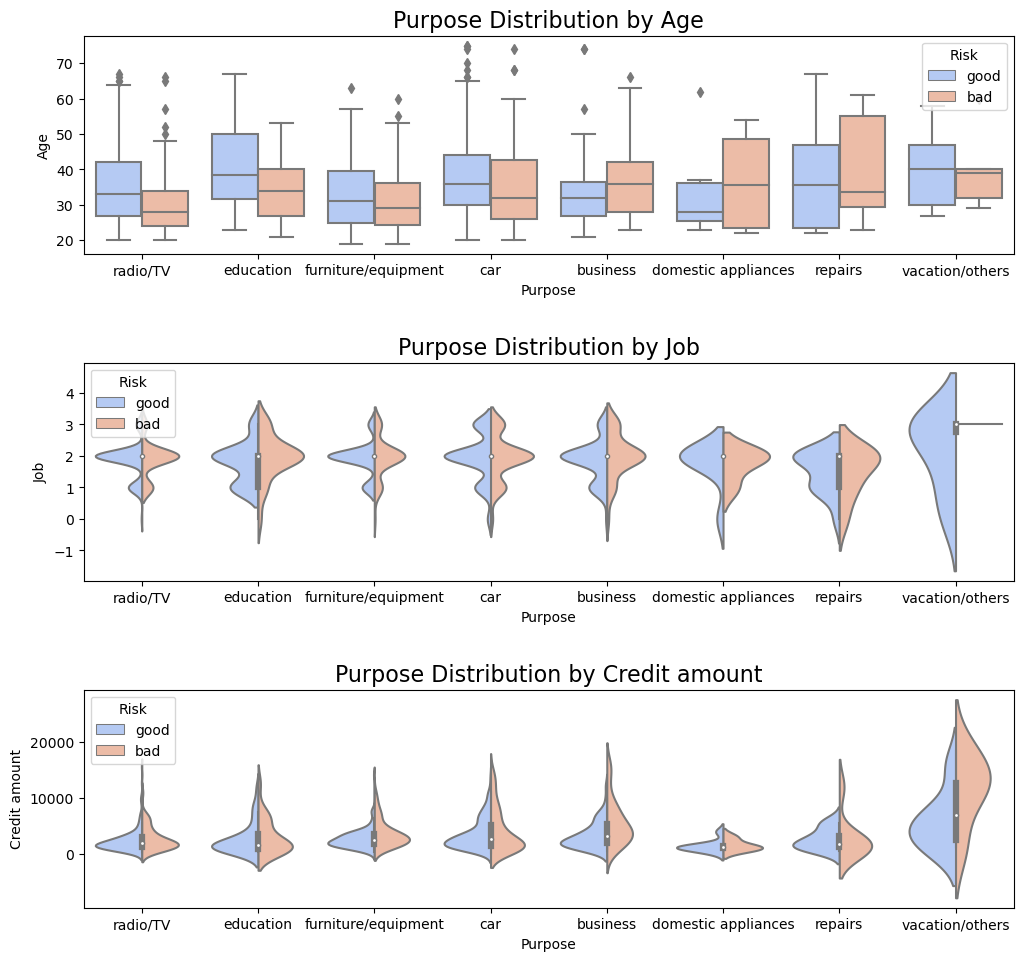

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12, 8))

sns.boxplot(x="Purpose", y="Age", data=df, hue="Risk", palette="coolwarm", ax=ax1)
sns.violinplot(x="Purpose", y="Job", data=df, hue="Risk", palette="coolwarm", split=True, ax=ax2)
sns.violinplot(x="Purpose", y="Credit amount", data=df, hue="Risk", palette="coolwarm", split=True, ax=ax3)


ax1.set_title("Purpose Distribution by Age", fontsize=16)
ax2.set_title("Purpose Distribution by Job", fontsize=16)
ax3.set_title("Purpose Distribution by Credit amount", fontsize=16)

plt.subplots_adjust(wspace = 0.7, hspace = 0.5,top = 1.2)

plt.show()

# 6. Distruibution of Duration by Risk

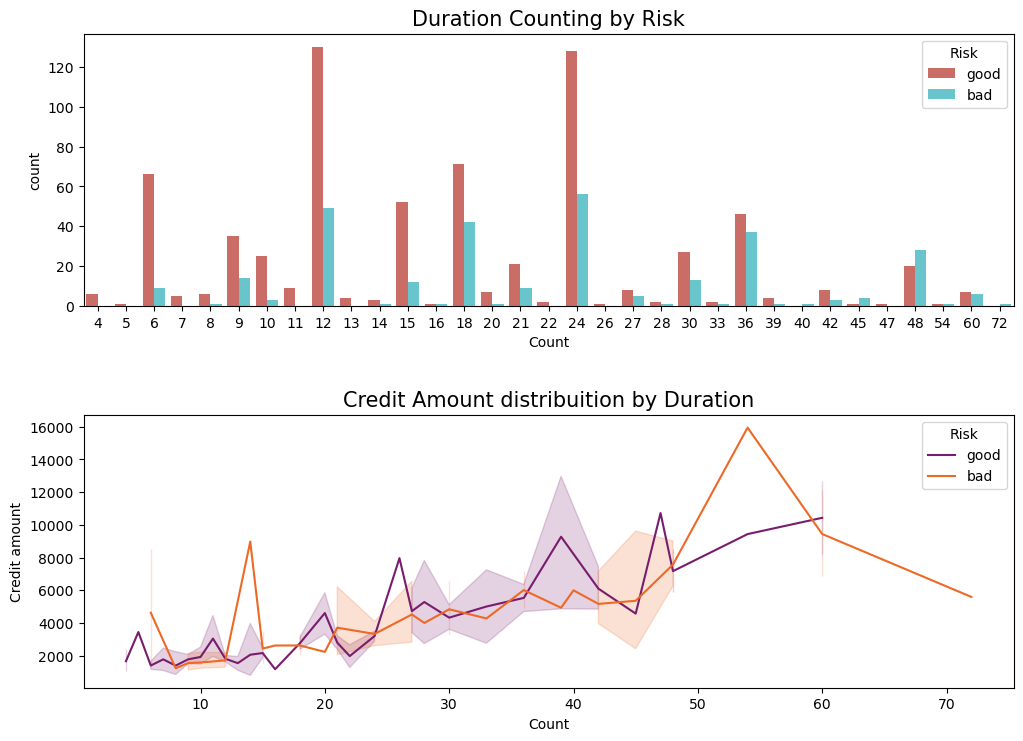

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,6))

sns.countplot(x="Duration", data=df, hue = "Risk", palette="hls", ax=ax1)
sns.lineplot(x="Duration", y="Credit amount", data=df, hue="Risk", palette="inferno", ax=ax2)


ax1.set_title("Duration Counting by Risk", fontsize=15)
ax1.set_xlabel("Duration")
ax1.set_xlabel("Count")

ax2.set_title("Credit Amount distribuition by Duration", fontsize=15)
ax2.set_xlabel("Duration")
ax2.set_xlabel("Count")

plt.subplots_adjust(wspace = 0.7, hspace = 0.4,top = 1.2)

plt.show()


# 7. Distruibution of Checking account by Risk

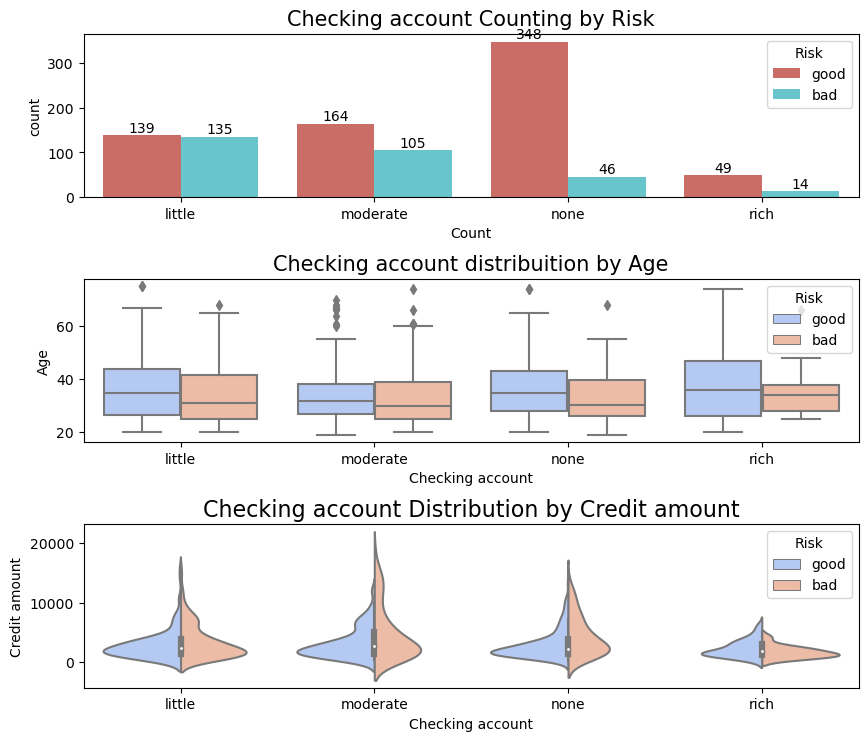

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,6))

sns.countplot(x="Checking account", data=df, hue = "Risk", palette="hls", ax=ax1)
sns.boxplot(x="Checking account", y="Age", data=df, hue="Risk", palette="coolwarm", ax=ax2)
sns.violinplot(x="Checking account", y="Credit amount", data=df, hue="Risk", palette="coolwarm", split=True, ax=ax3)

ax1.set_title("Checking account Counting by Risk", fontsize=15)
ax1.set_xlabel("Checking account")
ax1.set_xlabel("Count")

ax2.set_title("Checking account distribuition by Age", fontsize=15)
ax3.set_title("Checking account Distribution by Credit amount", fontsize=16)


for ax in [ax1]:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center',
                    va='bottom')

plt.subplots_adjust(wspace = 0.7, hspace = 0.5,top = 1.2)

plt.show()
